In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## A/B Testing

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [3]:
smoking_and_birthweight = baby.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [4]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


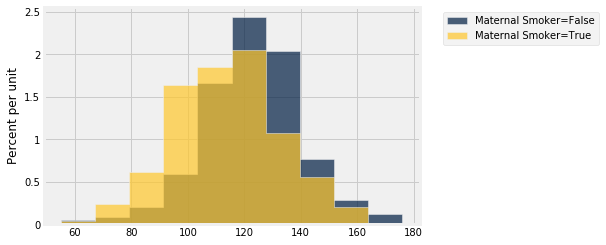

In [5]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [6]:
means_tbl = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_tbl

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [7]:
means = means_tbl.column(1)
observed_difference = means.item(0) - means.item(1)
observed_difference

9.266142572024918

In [8]:
weights = smoking_and_birthweight.select('Birth Weight')
weights

Birth Weight
120
113
128
108
136
138
132
120
143
140


In [9]:
weights.sample(with_replacement=False)

Birth Weight
134
103
104
118
125
116
107
136
144
105


In [10]:
shuffled_weights = weights.sample(with_replacement=False).column(0)

In [11]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Birth Weight', shuffled_weights
)

In [12]:
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Birth Weight
False,120,112
False,113,98
True,128,114
True,108,135
False,136,136
False,138,84
False,132,117
False,120,135
True,143,91
False,140,123


In [13]:
original_and_shuffled.group('Maternal Smoker', np.average)

Maternal Smoker,Birth Weight average,Shuffled Birth Weight average
False,123.085,119.364
True,113.819,119.617


In [14]:
group_labels = baby.select('Maternal Smoker')
group_labels

Maternal Smoker
False
False
True
True
False
False
False
False
True
False


In [15]:
# array of shuffled weights

# table with shuffled weights assigned to group labels

# array of means of the two groups

# difference between means of the two groups

In [16]:
shuffled_weights = weights.sample(with_replacement=False).column(0)
shuffled_tbl = group_labels.with_column('Shuffled Weight', shuffled_weights)
means = shuffled_tbl.group('Maternal Smoker', np.average).column(1)
new_difference = means.item(0) - means.item(1)
new_difference

-0.43178390237213193

In [17]:
differences = make_array()

for i in np.arange(5000):
    shuffled_weights = weights.sample(with_replacement = False).column(0)
    shuffled_tbl = group_labels.with_column('Shuffled Weight', shuffled_weights)
    means = shuffled_tbl.group('Maternal Smoker', np.average).column(1)
    new_difference = means.item(0) - means.item(1)
    differences = np.append(differences, new_difference)
    

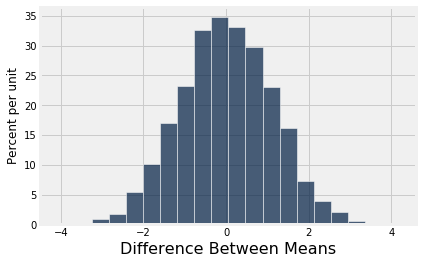

In [18]:
Table().with_column('Difference Between Means', differences).hist(bins=20, ec='w')

In [19]:
observed_difference

9.266142572024918

## Deflategate

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [20]:
football = Table.read_table('deflategate.csv')
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [21]:
football = football.drop(1, 2).with_column(
    'Combined', (football.column(1) + football.column(2)) / 2
)

In [22]:
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [23]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [24]:
start = np.append(12.5 * np.ones(11), 13 * np.ones(4))
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [25]:
drops = start - football.column(1)
drops

array([0.85 , 1.475, 1.175, 1.65 , 1.225, 0.725, 0.425, 1.175, 1.35 ,
       1.8  , 1.375, 0.475, 0.475, 0.275, 0.65 ])

In [26]:
football = football.select('Team').with_column(
    'Drop', drops
)

In [27]:
football.show()

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


In [28]:
means_tbl = football.group('Team', np.average)

In [29]:
means_tbl

Team,Drop average
Colts,0.46875
Patriots,1.20227


In [30]:
means = means_tbl.column(1)
observed_difference = means.item(0) - means.item(1)

In [31]:
observed_difference

-0.733522727272728

In [32]:
group_labels = football.select('Team')
drop_tbl = football.select('Drop')

In [33]:
shuffled_drops = drop_tbl.sample(with_replacement=False).column(0)
shuffled_tbl = group_labels.with_column('Shuffled Drop', shuffled_drops)
means = shuffled_tbl.group('Team', np.average).column(1)
new_difference = means.item(0) - means.item(1)
new_difference

0.05909090909090864

In [34]:
differences = make_array()

for i in np.arange(20000):
    shuffled_drops = drop_tbl.sample(with_replacement=False).column(0)
    shuffled_tbl = group_labels.with_column('Shuffled Drop', shuffled_drops)
    means = shuffled_tbl.group('Team', np.average).column(1)
    new_difference = means.item(0) - means.item(1)
    differences = np.append(differences, new_difference)
    

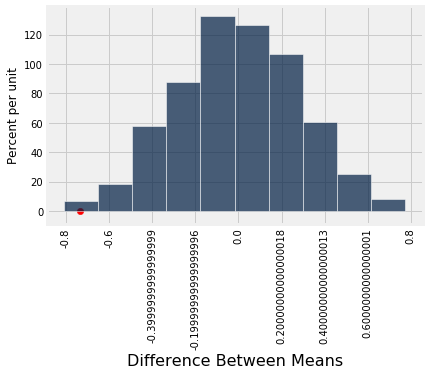

In [35]:
Table().with_column('Difference Between Means', differences).hist(ec='w')
plots.scatter(observed_difference, 0, color='red', s=40);

In [36]:
np.count_nonzero(differences <= observed_difference) / 20000

0.0032